Loads data from the dataset and applies transformntions


In [43]:

import matplotlib.pyplot as plt # for plotting
import numpy as np # for transformation

import torch # PyTorch package
import torchvision # load datasets
import torchvision.transforms as transforms # transform data
import torch.nn as nn # basic building block for neural neteorks
import torch.nn.functional as F # import convolution functions like Relu
import torch.optim as optim # optimzer

batch_size = 32

def load_data():

    data_transforms = {
    'training' : transforms.Compose([transforms.RandomResizedCrop(224),
                                    transforms.RandomHorizontalFlip(),transforms.RandomRotation(30),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], 
                                                         [0.229, 0.224, 0.225])]),
                                                            
    'validation' : transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])]),

    'testing' : transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])])
    }

    train_set = torchvision.datasets.Flowers102(root='./data', split="train", download=True, transform=data_transforms['training'])
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

    test_set = torchvision.datasets.Flowers102(root='./data', split="test", download=True, transform=data_transforms['testing'])
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

    val_set = torchvision.datasets.Flowers102(root='./data', split="val", download=True, transform=data_transforms['validation'])
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2)                                        
    
    return train_set, test_set, val_set, test_loader, train_loader, val_loader

train_set, test_set, val_set, test_loader, train_loader, val_loader = load_data()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


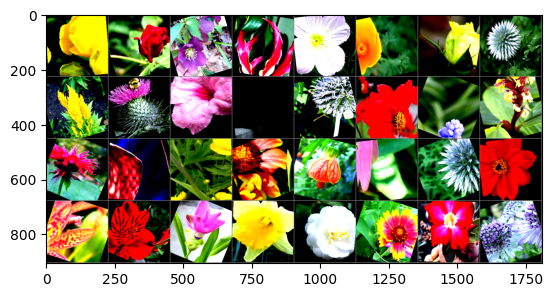

tensor(15)
tensor(73)
tensor(39)
tensor(20)
tensor(0)
tensor(64)
tensor(73)
tensor(9)
tensor(26)
tensor(13)
tensor(97)
tensor(2)
tensor(9)
tensor(55)
tensor(24)
tensor(60)
tensor(91)
tensor(22)
tensor(15)
tensor(99)
tensor(96)
tensor(16)
tensor(9)
tensor(55)
tensor(101)
tensor(17)
tensor(38)
tensor(41)
tensor(95)
tensor(99)
tensor(84)
tensor(37)


In [44]:
def imshow(img):
  ''' function to show image '''
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy() # convert to numpy objects
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get random training images with iter function
dataiter = iter(train_loader)
images, labels = next(dataiter)

# call function on our images
imshow(torchvision.utils.make_grid(images))

# print the class of the image
for i in range(batch_size):
  print(labels[i])

In [50]:
class Net(nn.Module):
	
    def __init__(self, l1=120, l2=84):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, 5)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(16, 32, 5) 
        self.bn2 = nn.BatchNorm2d(32)

        self.fl = nn.Flatten()
        self.fc1 = nn.Linear(32 * 53 * 53, l1)
        self.fc2 = nn.Linear(l1, l2)
        self.fc3 = nn.Linear(l2, 102)

    def forward(self, x):
        x = self.pool(self.bn1(F.relu(self.conv1(x))))
        x = self.pool(self.bn2(F.relu(self.conv2(x))))
        x = self.fl(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=89888, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=102, bias=True)
)


In [9]:
class CustomModel(nn.Module):
    def __init__(self, num_classes):
        super(CustomModel, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)

        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)

        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)

        self.fc1 = nn.Linear(100352, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.bn1(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.bn2(x)
        x = self.pool(x)

        x = self.conv3(x)
        x = F.relu(x)
        x = self.bn3(x)
        x = self.pool(x)

        x = self.conv4(x)
        x = F.relu(x)
        x = self.bn4(x)
        x = self.pool(x)

        x = x.reshape(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)

# Instantiate the model
num_classes = 102
net = CustomModel(num_classes)

In [52]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=10)

In [63]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)
scheduler = ReduceLROnPlateau(optimizer, 'min')

In [47]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [48]:
from torch.autograd import Variable

def train(epoch_num, model):
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)

    start.record()

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    model.to(device)

    ideal = model
    min_running_loss = 100.0
    min_val_loss = 100.0

    for epoch in range(epoch_num):  # loop over the dataset multiple times
        running_loss = 0.0
        model.train()
        for i, (images, labels) in enumerate(train_loader, 0):
            
            # get the inputs; data is a list of [inputs, labels]
            images = images.to(device)
            labels = labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
            

        valid_loss = 0.0
        model.eval()
        for i, (images, labels) in enumerate(val_loader, 0):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            vloss = criterion(outputs, labels)
            valid_loss = vloss.item()*images.size(0)

        print(f'Epoch {epoch+1} \t\t Training Loss: {running_loss / len(train_loader)} \t\t Validation Loss: {valid_loss / len(val_loader)}')
        print("lr: ", get_lr(optimizer))
        #accuracy = testAccuracy(model)
        #print("\nepoch: ",epoch,"/",epoch_num," ... Loss: ",loss.item())
        #print('EPOCH:', epoch,'---> TEST ACCURACY: %d %%' % (accuracy))

        # validation dat

        #print("\nepoch: ",epoch,"/",epoch_num," ... Loss: ",loss.item()," VLoss: ", vloss.item())

        scheduler.step(running_loss)

        if running_loss < min_running_loss and valid_loss <= min_val_loss:
            min_running_loss = running_loss
            min_val_loss = valid_loss
            ideal = model


    # whatever you are timing goes here
    end.record()

    # Waits for everything to finish running
    torch.cuda.synchronize()
    print(start.elapsed_time(end))  # milliseconds

    return ideal



In [7]:
def test(data, model):
    correct = 0
    total = 0
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Convert model parameters and buffers to CPU or Cuda
    model.to(device)

    with torch.no_grad():
        for value in data:
            images, labels = value
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

In [53]:
if __name__ == "__main__":
    torch.cuda.empty_cache()
    
    # train the model with epoch number, model
    ideal = train(170, net)
    print('Finished Training')

    # Accuracy on training data
    test(train_loader, net)
    test(train_loader, ideal)
    print("--------------")
    # Accuracy on valid data
    test(val_loader, net)
    test(val_loader, ideal)
    print("--------------") 
    # Accuracy on test data
    test(test_loader, net)
    test(test_loader, ideal)
    

The model will be running on cuda:0 device


In [35]:
# Accuracy on training data
test(train_loader, net)
#test(train_loader, ideal)
print("--------------")
# Accuracy on valid data
test(val_loader, net)
#test(val_loader, ideal)
print("--------------") 
# Accuracy on test data
test(test_loader, net)
#test(test_loader, ideal)

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


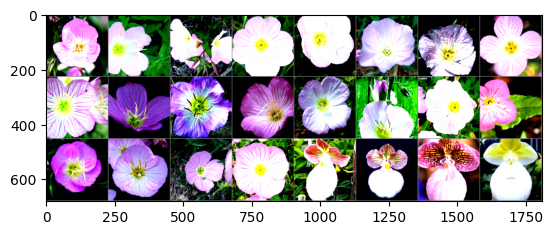

GroundTruth: 
tensor(0)
tensor(0)
tensor(0)
tensor(0)


In [9]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ')
for i in range(4):
  print(labels[i])

In [10]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

for i in range(4):
  print(predicted[i])


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [ ]:
correct = 0
total = 0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("The model will be running on", device, "device")
# Convert model parameters and buffers to CPU or Cuda
net.to(device)

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

The model will be running on cuda:0 device
Accuracy of the network on the 10000 test images: 31 %
